## Time Series Exploration

In [1]:
# general imports
import pandas as pd
import requests
import numpy as np
import datetime
import acquire
import prepare
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

## Store Data Set

In [2]:
df = acquire.get_groceries()

In [3]:
df = prepare.prep_groceries(df, 'sale_date')

In [4]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Shape: (913000, 16)


In [5]:
df.head()

,sale_qty,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,day_of_week,month,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Tuesday,January,10.92
2013-01-01 00:00:00+00:00,26,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,Tuesday,January,218.40
2013-01-01 00:00:00+00:00,27,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,Tuesday,January,125.55
2013-01-01 00:00:00+00:00,54,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,Tuesday,January,453.60
2013-01-01 00:00:00+00:00,35,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,Tuesday,January,294.00


In [9]:
train = df.loc[:'2016'] # includes 2016
test = df.loc['2017']

<AxesSubplot:xlabel='sale_date'>

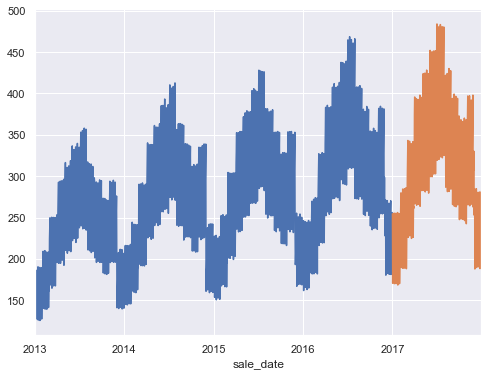

In [11]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()

#### Takeaways:
- Seasonality shows a clear 12 month cycle with a peak in the summer months, and valley in the winter
- There is also a clear upward trend year over year
- Also the last 3 months of the year appear interesting (larger than normal dip in October, folloed by big jump in November, and DRAMATIC drop off for december)

In [12]:
# let's look at our target variable 'sales_total'
y = train.resample('D').sales_total.mean()

Text(0, 0.5, 'Difference in sales from one day to the next')

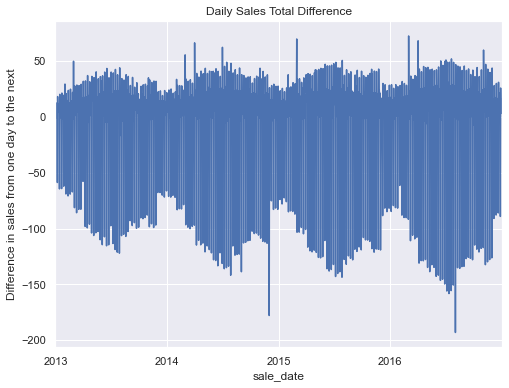

In [13]:
# what is the daily difference?
y.diff().plot()
plt.title('Daily Sales Total Difference')
plt.ylabel('Difference in sales from one day to the next')

Text(0, 0.5, '% Change')

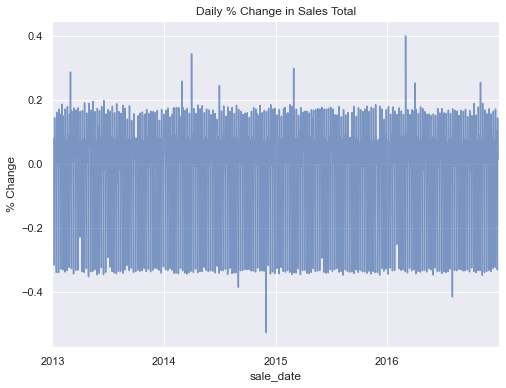

In [14]:
# what about % daily difference?
(y.diff() / y.shift()).plot(alpha=.7)
plt.title('Daily % Change in Sales Total')
plt.ylabel('% Change')

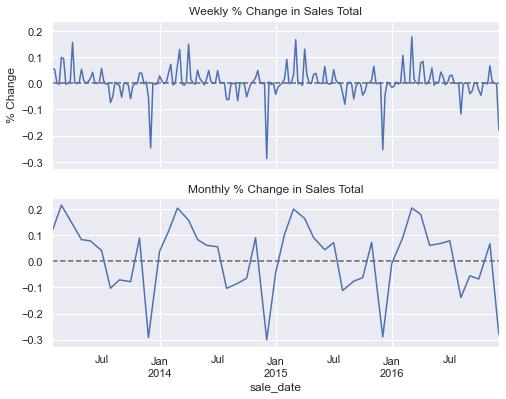

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')
ax1.hlines(0, *ax2.get_xlim(), color='black', alpha=.6, ls='--')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')
ax2.hlines(0, *ax2.get_xlim(), color='black', alpha=.6, ls='--')